Simple MapleTax Demo

# Imports

In [1]:
import typing as t
import sys
import io
import os
import logging

In [2]:
from importlib import reload

In [3]:
logger = logging.getLogger(__name__)

In [4]:
logging.basicConfig()

In [5]:
logging.root.setLevel(logging.INFO)

In [6]:
logger.info("pouet")

INFO:__main__:pouet


In [7]:
logging.getLogger("mapletax.formfiller.draw").setLevel(logging.WARNING)

In [8]:
import sympy

In [18]:
from IPython.display import IFrame

In [16]:
from pygments import highlight
from pygments.lexers import YamlLexer
from pygments.formatters import HtmlFormatter
from IPython.display import HTML

display(HTML("""
<style>
{pygments_css}
</style>
""".format(pygments_css=HtmlFormatter().get_style_defs('.highlight'))))

In [23]:
from wand.image import Image as WImage

# MapleTax Imports

In [9]:
from mapletax.formfiller.serialization import load
from mapletax.toonies.slips import slips_from_info
from mapletax.toonies.ca import forms as ca_forms
from mapletax.toonies.qc import forms as qc_forms

# User Data

In [10]:
info_file = os.path.expanduser("~/.local/opt/mapletax/toonies/samples/rita-2023.yml")

In [11]:
with io.open(info_file, "r") as fi:
	info_data = fi.read()

In [12]:
display(HTML(data=highlight(info_data, YamlLexer(), HtmlFormatter())))

In [13]:
info = load(info_file)
allslips = slips_from_info(info["slips"])
year = info["year"]

# Federal

In [14]:
forms = ca_forms.get_forms(year, "QC")
forms.apply_slips_information(allslips)
ca_forms.print_forms(forms, "rita")

INFO:mapletax.toonies.ca.forms:/form1[0]/Page5[0]/Part_A[0]/Column1[0]/Amount_Line71[0] is not calculated yet (T1_70): <class 'sympy.core.symbol.Symbol'>/T1_70
INFO:mapletax.toonies.ca.forms:/form1[0]/Page5[0]/Part_A[0]/Column1[0]/Amount_Line72[0] is not calculated yet (T1_71): <class 'sympy.core.symbol.Symbol'>/T1_71
INFO:mapletax.toonies.ca.forms:/form1[0]/Page5[0]/Part_A[0]/Column1[0]/Amount_Line73[0] is not calculated yet (T1_72): <class 'sympy.core.symbol.Symbol'>/T1_72
INFO:mapletax.toonies.ca.forms:/form1[0]/Page5[0]/Part_A[0]/Column1[0]/Percent_Line74[0] is not calculated yet (T1_73): <class 'sympy.core.symbol.Symbol'>/T1_73
INFO:mapletax.toonies.ca.forms:/form1[0]/Page5[0]/Part_A[0]/Column1[0]/Amount_Line75[0] is not calculated yet (T1_74): <class 'sympy.core.symbol.Symbol'>/T1_74
INFO:mapletax.toonies.ca.forms:/form1[0]/Page5[0]/Part_A[0]/Column1[0]/Amount_Line76[0] is not calculated yet (T1_75): <class 'sympy.core.symbol.Symbol'>/T1_75
INFO:mapletax.toonies.ca.forms:/form1[0

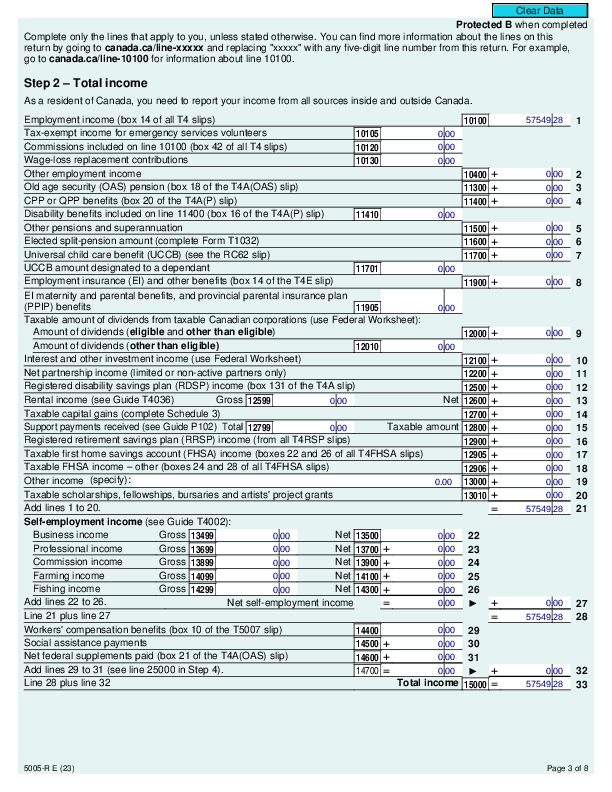

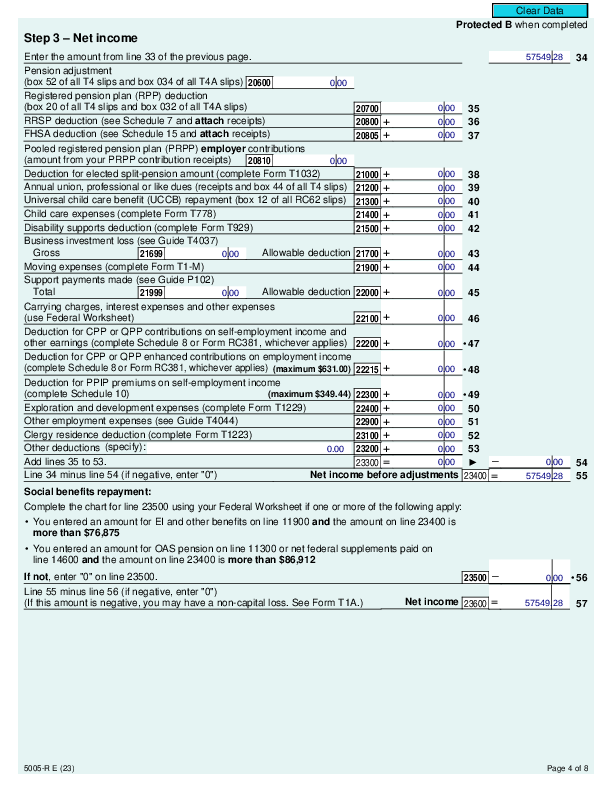

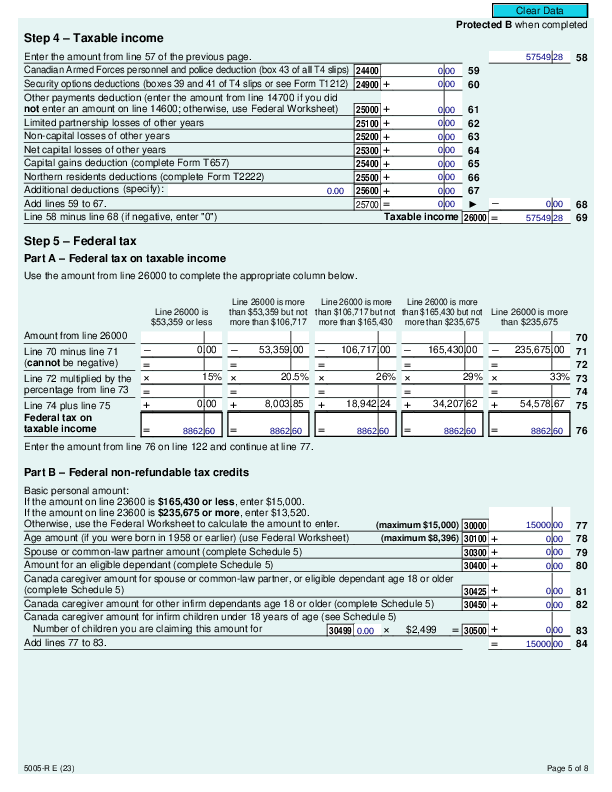

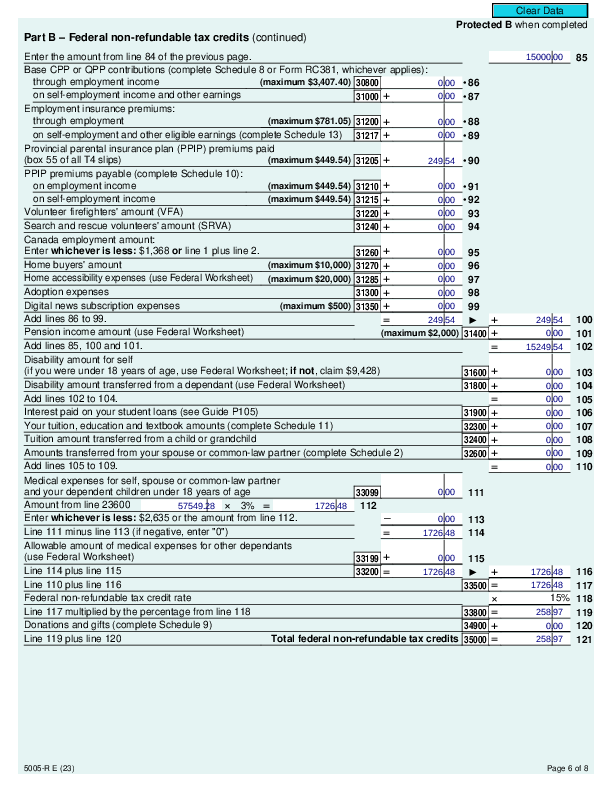

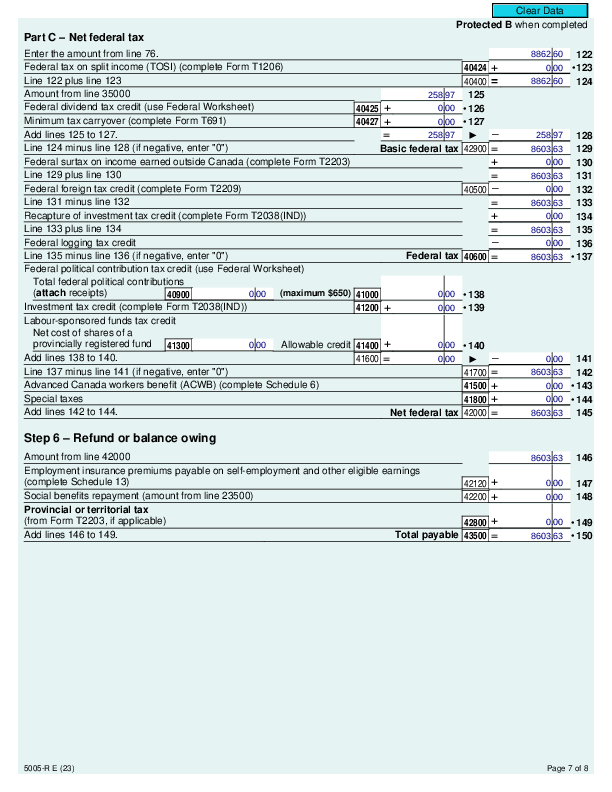

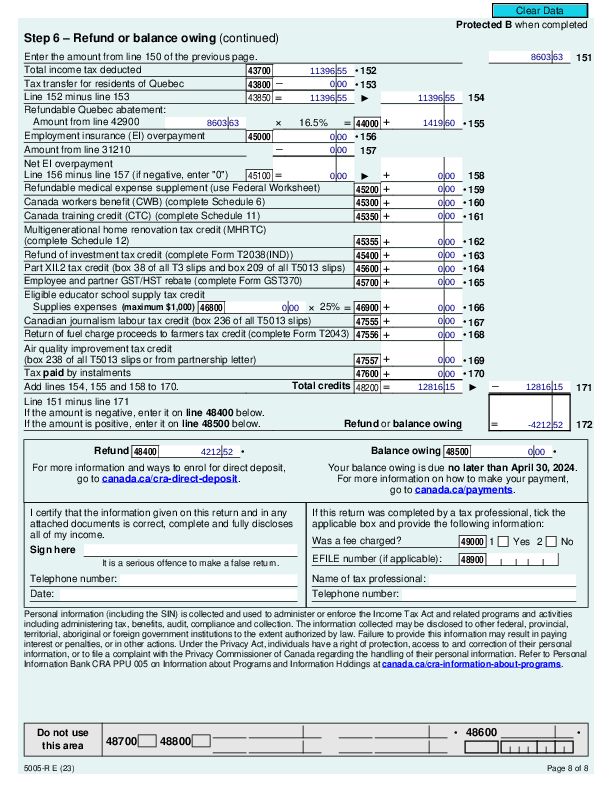

In [31]:
#IFrame("rita-T1.pdf", width=600, height=300)
for i in (3,4,5,6,7,8):
	img = WImage(filename=f"rita-T1.pdf[{i-1}]")
	display(img)

# Provincial

In [15]:
forms = qc_forms.get_forms(year)
forms.apply_slips_information(allslips)
qc_forms.print_forms(forms, "rita")

INFO:mapletax.toonies.qc.forms:Files: {'TP-1.D': 'TP-1.D(2023-12)', 'AnxA': 'TP-1.D.A(2023-12)', 'AnxB': 'TP-1.D.B(2023-12)', 'AnxC': 'TP-1.D.C(2023-12)', 'AnxD': 'TP-1.D.D(2023-12)', 'AnxE': 'TP-1.D.E(2023-12)', 'AnxF': 'TP-1.D.F(2023-12)', 'AnxG': 'TP-1.D.G(2023-12)', 'AnxH': 'TP-1.D.H(2023-12)', 'AnxJ': 'TP-1.D.J(2023-12)', 'AnxK': 'TP-1.D.K(2023-12)', 'AnxL': 'TP-1.D.L(2023-12)', 'AnxM': 'TP-1.D.M(2023-12)', 'AnxN': 'TP-1.D.N(2023-12)', 'AnxP': 'TP-1.D.P(2023-12)', 'AnxQ': 'TP-1.D.Q(2023-12)', 'AnxR': 'TP-1.D.R(2023-12)', 'AnxS': 'TP-1.D.S(2023-12)', 'AnxT': 'TP-1.D.T(2023-12)', 'AnxV': 'TP-1.D.V(2023-12)'}
INFO:mapletax.toonies.qc.forms:numeric-19 is not calculated yet (TP1_19): <class 'sympy.core.symbol.Symbol'>/TP1_19
INFO:mapletax.toonies.qc.forms:numeric-51 is not calculated yet (TP1_51): <class 'sympy.core.symbol.Symbol'>/TP1_51
INFO:mapletax.toonies.qc.forms:numeric-96.1 is not calculated yet (TP1_96.1): <class 'sympy.core.symbol.Symbol'>/TP1_96.1
INFO:mapletax.toonies.qc.fo

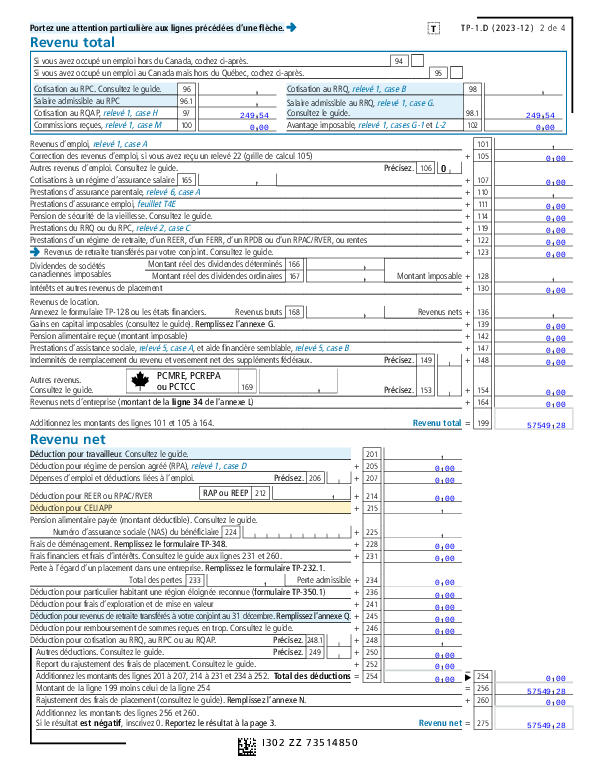

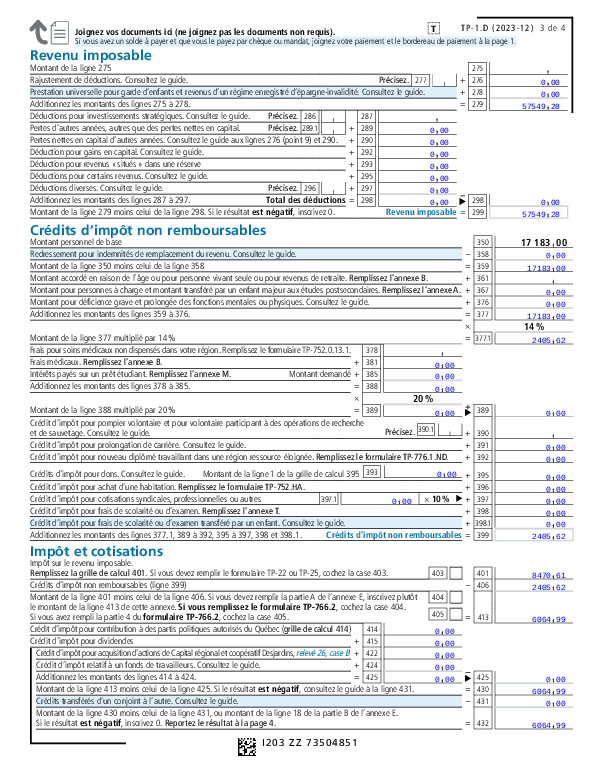

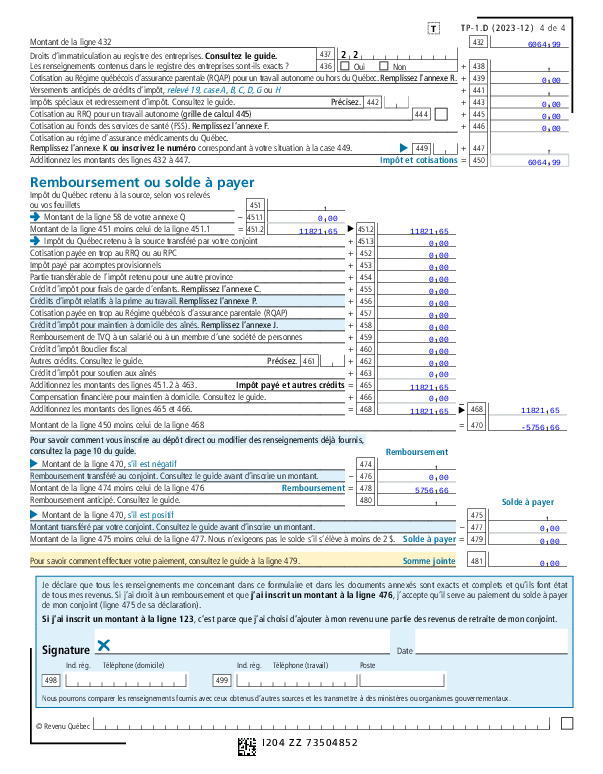

In [29]:
#IFrame("rita-TP-1.D.pdf", width=600, height=300)
for i in (2,3,4):
	img = WImage(filename=f"rita-TP-1.D.pdf[{i-1}]")
	display(img)